# Preparation

Run once the unzip command below

In [2]:
!unzip deploy4.zip -d finn_demo_4

Archive:  deploy4.zip
   creating: finn_demo_4/deploy/
   creating: finn_demo_4/deploy/bitfile/
  inflating: finn_demo_4/deploy/bitfile/finn-accel.bit  
  inflating: finn_demo_4/deploy/bitfile/finn-accel.hwh  
   creating: finn_demo_4/deploy/driver/
  inflating: finn_demo_4/deploy/driver/validate.py  
  inflating: finn_demo_4/deploy/driver/driver_base.py  
  inflating: finn_demo_4/deploy/driver/driver.py  
   creating: finn_demo_4/deploy/driver/runtime_weights/
   creating: finn_demo_4/deploy/driver/finn/
   creating: finn_demo_4/deploy/driver/finn/util/
  inflating: finn_demo_4/deploy/driver/finn/util/__init__.py  
  inflating: finn_demo_4/deploy/driver/finn/util/data_packing.py  
   creating: finn_demo_4/deploy/driver/qonnx/
   creating: finn_demo_4/deploy/driver/qonnx/core/
  inflating: finn_demo_4/deploy/driver/qonnx/core/__init__.py  
  inflating: finn_demo_4/deploy/driver/qonnx/core/datatype.py  
   creating: finn_demo_4/deploy/driver/qonnx/util/
  inflating: finn_demo_4/deploy/d

In [2]:
cd finn-demo/deploy/driver

/home/xilinx/jupyter_notebooks/PYNQ_inference/finn-demo/deploy/driver


In [3]:
ls

driver_base.py  driver.py  finn/  qonnx/  runtime_weights/  validate.py


In [5]:
!sudo python3.6 -m pip install bitstring

# Driver Throughput Test

In [7]:
!sudo python3.6 driver.py  --bitfile ../bitfile/finn-accel.bit --exec_mode throughput_test

Results written to nw_metrics.txt


In [8]:
!cat nw_metrics.txt

{'runtime[ms]': 0.5011558532714844, 'throughput[images/s]': 1995.3872502378688, 'DRAM_in_bandwidth[MB/s]': 6.129829632730733, 'DRAM_out_bandwidth[MB/s]': 0.1716033035204567, 'fclk[mhz]': 100.0, 'batch_size': 1, 'fold_input[ms]': 0.10228157043457031, 'pack_input[ms]': 0.10585784912109375, 'copy_input_data_to_device[ms]': 1.5823841094970703, 'copy_output_data_from_device[ms]': 0.5257129669189453, 'unpack_output[ms]': 31.477928161621094, 'unfold_output[ms]': 0.06651878356933594}

# Load the GTSRB dataset

In [7]:
#!pip install urllib

In [9]:
from os import path
import urllib
import urllib.request
import numpy as np
dataset_local = "/tmp/traffic-signs-data.zip"
if not path.isfile(dataset_local):
    dataset_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
    urllib.request.urlretrieve(dataset_url, dataset_local)
    ! unzip {dataset_local} -d /tmp

dataset_dict = np.load("/tmp/test.p", allow_pickle=True)
testx = dataset_dict["features"]
testy = dataset_dict["labels"]

Archive:  /tmp/traffic-signs-data.zip
  inflating: /tmp/test.p             
  inflating: /tmp/train.p            
  inflating: /tmp/valid.p            


In [10]:
gtsrb_classes = [
    '20 Km/h', 
    '30 Km/h', 
    '50 Km/h', 
    '60 Km/h', 
    '70 Km/h', 
    '80 Km/h', 
    'End 80 Km/h', 
    '100 Km/h', 
    '120 Km/h', 
    'No overtaking', 
    'No overtaking for large trucks', 
    'Priority crossroad', 
    'Priority road', 
    'Give way', 
    'Stop', 
    'No vehicles', 
    'Prohibited for vehicles with a permitted gross weight over 3.5t including their trailers, and for tractors except passenger cars and buses', 
    'No entry for vehicular traffic', 
    'Danger Ahead', 
    'Bend to left', 
    'Bend to right', 
    'Double bend (first to left)', 
    'Uneven road', 
    'Road slippery when wet or dirty', 
    'Road narrows (right)', 
    'Road works', 
    'Traffic signals', 
    'Pedestrians in road ahead', 
    'Children crossing ahead', 
    'Bicycles prohibited', 
    'Risk of snow or ice', 
    'Wild animals', 
    'End of all speed and overtaking restrictions', 
    'Turn right ahead', 
    'Turn left ahead', 
    'Ahead only', 
    'Ahead or right only', 
    'Ahead or left only', 
    'Pass by on right', 
    'Pass by on left', 
    'Roundabout', 
    'End of no-overtaking zone', 
    'End of no-overtaking zone for vehicles with a permitted gross weight over 3.5t including their trailers, and for tractors except passenger cars and buses', 
    'Not a roadsign'
]

In [11]:
print("Dataset shape is " + str(testx.shape))

Dataset shape is (12630, 32, 32, 3)


# Classify a single image

In [41]:
n = 12345
test_single_x = testx[n]
test_single_y = testy[n]

In [42]:
print(test_single_x.shape)
print(type(test_single_x))

(32, 32, 3)
<class 'numpy.ndarray'>


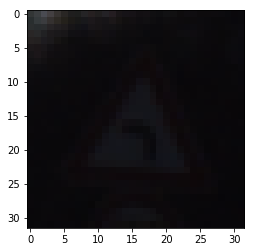

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.imshow(test_single_x)
plt.show()

In [52]:
import numpy as np
from tqdm import tqdm
n_sample = 10

gold_labels = []
predicts = []

for i in tqdm(range(n_sample)):
    test_single_x = testx[i]
    test_single_y = testy[i]
    
    np.save("input.npy", test_single_x.reshape((1, 32, 32, 3)))
    !sudo python3.6 driver.py --bitfile ../bitfile/finn-accel.bit --inputfile input.npy --outputfile output.npy --exec_mode execute

    # Specify the path to your output.npy file
    output_file_path = 'output.npy'

    # Load the contents of the .npy file
    output_data = np.load(output_file_path)

    predicted = np.argmax(output_data)
    
    gold_labels.append(test_single_y)
    predicts.append(predicted)

100%|██████████| 10/10 [01:11<00:00,  7.18s/it]


In [ ]:
!python3.6 -m pip install scikit-learn

  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Preparing metadata (setup.py) ... -

In [56]:
print(gold_labels, '\n', predicts)

[16, 1, 38, 33, 11, 38, 18, 12, 25, 35] 
 [5, 38, 34, 36, 11, 38, 18, 5, 33, 33]


In [54]:
from sklearn import classification_report

classification_report(gold_labels, predicts)

ModuleNotFoundError: No module named 'sklearn'

In [44]:
print("Expected class is:\n%s" % (gtsrb_classes[test_single_y]))

Expected class is:
Bend to left


In [45]:
def ishape_normal(ind=0):
    ret = list([(1, 32, 32, 3)][ind])
    ret[0] = 1
    return tuple(ret)

In [46]:
np.save("input.npy", test_single_x.reshape((1, 32, 32, 3)))


In [47]:
#test_single_x.reshape(accel.ishape_normal())
#accel_y = accel.execute(test_single_x.reshape(accel.ishape_normal()))
#print("Accelerator result is:\n%s" % (gtsrb_classes[np.argmax(accel_y)]))

In [49]:
!sudo python3.6 driver.py --bitfile ../bitfile/finn-accel.bit --inputfile input.npy --outputfile output.npy --exec_mode execute

In [50]:
import numpy as np

# Specify the path to your output.npy file
output_file_path = 'output.npy'

# Load the contents of the .npy file
output_data = np.load(output_file_path)

# Print the contents of the .npy file
print(output_data)


[[122. 128. 109. 145. 121. 151. 121. 101. 116. 140. 126. 116. 121. 149.
  129. 137. 119. 140. 156. 131. 134. 118. 124. 123. 120. 129. 125. 129.
  134. 146. 130. 140. 142. 133. 134. 109. 129. 107. 141. 111.  99. 134.
  112.]]


In [51]:
print(gtsrb_classes[np.argmax(output_data)])
print(np.argmax(output_data))

Danger Ahead
18


# Validation

In [ ]:
!sudo python3.6 validate.py --batchsize 1000 --dataset /tmp/test.p  --bitfile bitfile_name

# Benchmark

In [59]:
!sudo python3.6 driver.py --exec_mode throughput_test --bitfile ../bitfile/finn-accel.bit  --batchsize 1000
!cat nw_metrics.txt

Results written to nw_metrics.txt
{'runtime[ms]': 82.08155632019043, 'throughput[images/s]': 12183.004865296638, 'DRAM_in_bandwidth[MB/s]': 37.42619094619127, 'DRAM_out_bandwidth[MB/s]': 1.0477384184155107, 'fclk[mhz]': 100.0, 'batch_size': 1000, 'fold_input[ms]': 0.1671314239501953, 'pack_input[ms]': 0.13518333435058594, 'copy_input_data_to_device[ms]': 21.0418701171875, 'copy_output_data_from_device[ms]': 1.0249614715576172, 'unpack_output[ms]': 36047.640800476074, 'unfold_output[ms]': 0.09059906005859375}

In [ ]:
#accel.batch_size = 100
#accel.throughput_test()